# **Import Necessary Libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('titanic')

# **Start looking into the data**

In [3]:
print(df.shape)
print(df.columns)
df.head(5)

(891, 15)
Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Show missing values**

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


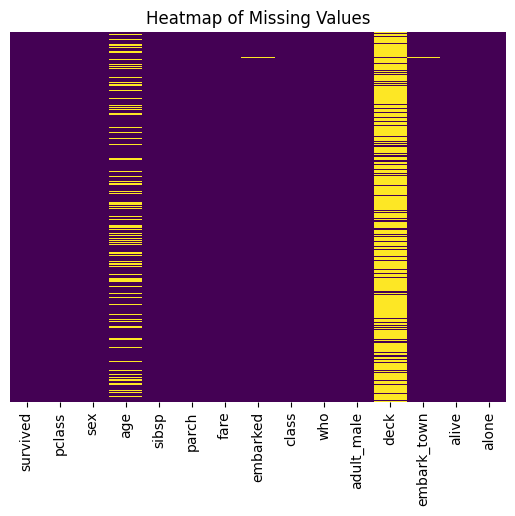

In [5]:
print(df.isnull().sum())
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap="viridis")
plt.title("Heatmap of Missing Values")
plt.show()

Missing pattern heatmap shows dense coloumns of missing data in Age and Cabin.

# **Univariate Analysis**

Categorical Features count Plots

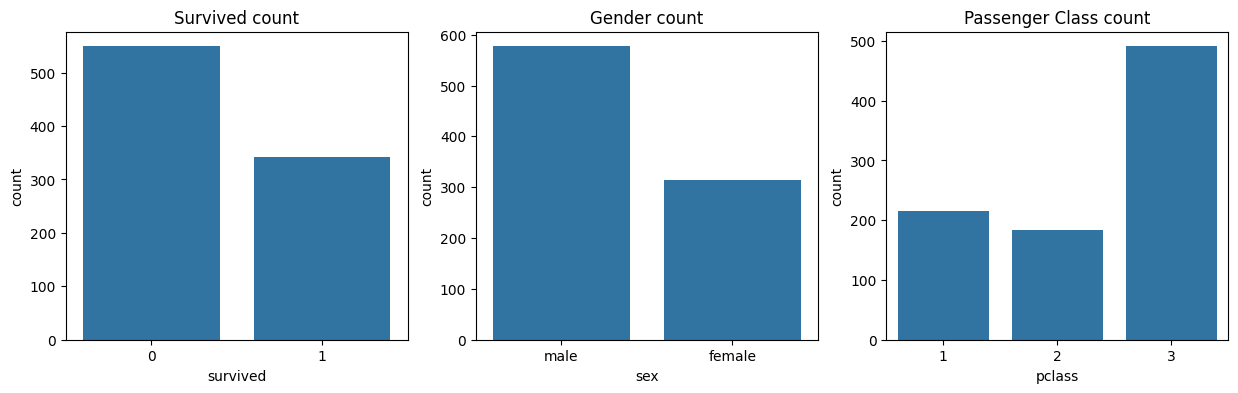

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))
sns.countplot(x="survived", data=df, ax=axes[0]).set_title("Survived count")
sns.countplot(x="sex", data=df, ax=axes[1]).set_title("Gender count")
sns.countplot(x="pclass", data=df, ax=axes[2]).set_title("Passenger Class count")
plt.show()

A majority of passengers died. More males boarded than females.

**Numerical Features**

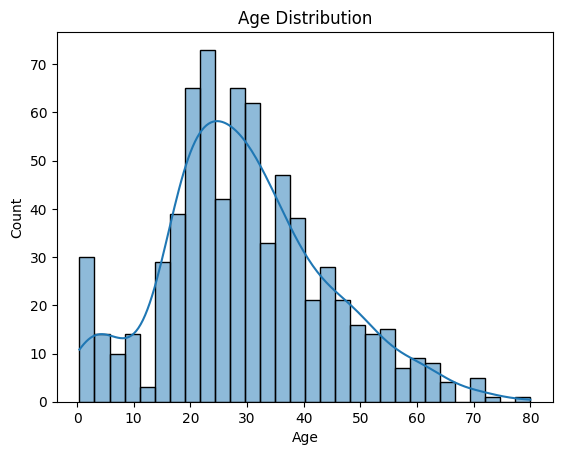

In [10]:
sns.histplot(df['age'], kde=True, bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()

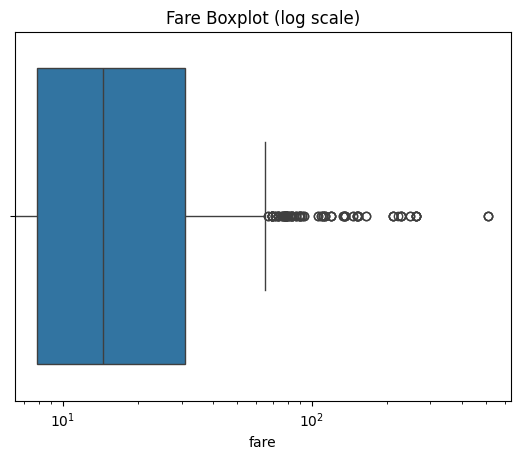

In [11]:
sns.boxplot(x=df['fare'])
plt.title("Fare Boxplot (log scale)")
plt.xscale('log')
plt.show()

Outlier dominated boxplot and highly skewed plot

# **Bi-Variate Analysis**

**Sex Vs. Survival Rate**

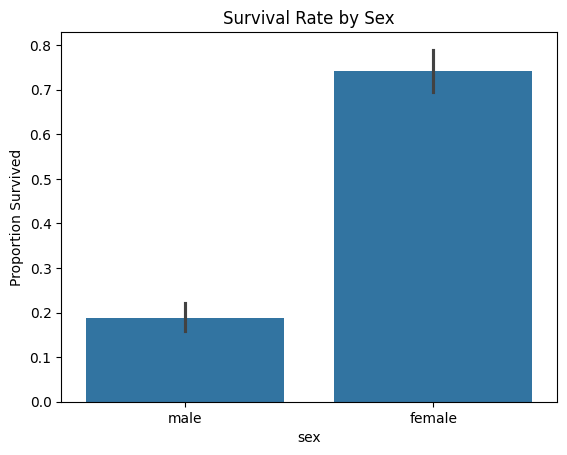

In [12]:
sns.barplot(x="sex", y="survived", data=df)
plt.title("Survival Rate by Sex")
plt.ylabel("Proportion Survived")
plt.show()

Women were more likely to survive than men.

**Passenger Class vs. Survival Rate**

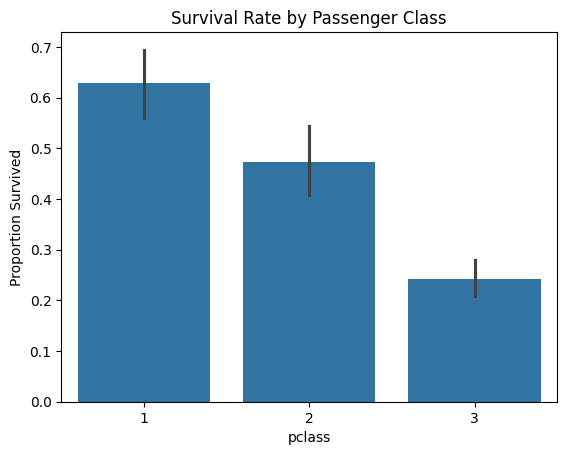

In [13]:
sns.barplot(x="pclass", y="survived", data=df)
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Proportion Survived")
plt.show()

62% of 1st-class passengers survived, about 48% of 2nd-class, and only 25% of 3rd-class

**Age vs. Survival**

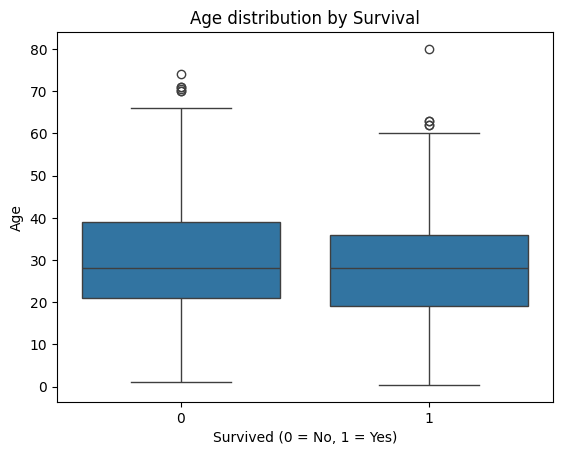

In [15]:
sns.boxplot(x="survived", y="age", data=df)
plt.title("Age distribution by Survival")
plt.ylabel("Age")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.show()

**FEATURE CORRELATION**

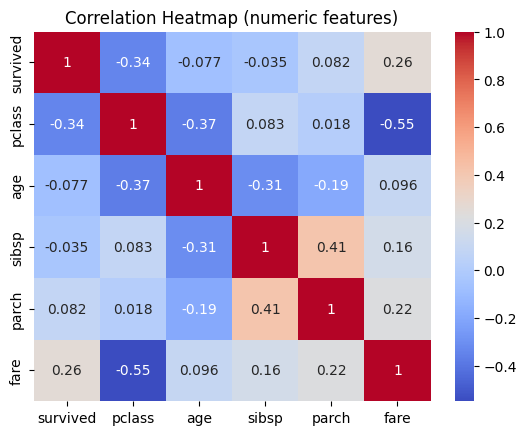

In [17]:
corr = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (numeric features)")
plt.show()

1. Sex and Pclass are the strongest predictors of survival.
2. Women and higher-class passengers had much higher survival rate.
3. Large families (high SibSp or Parch) slightly reduced survival odds.
4. The heatmap shows siblings and parents traveling together.

# **Summary of Findings**

1. Data size: 891 passengers, 12 columns

2. Missing values: Age (177 missing), Cabin (687 missing), Embarked (2 missing)

3. Outliers: Fare has a huge outlier (max 512)

**Numeric summaries:**
~38% survived
Age spans 0.4–80
median fare ~14, mean ~32
**Category frequencies:**
More males than females boarded.

**Key relationships:**
1. Females had a much higher survival rate
2. Higher class passengers survived at higher rates